# EDA

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd

module_path = os.path.abspath(os.path.join(os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import dataloading as dl

import matplotlib.pyplot as plt
import seaborn as sns

targetdir = "../data/extracted/"

## Liquid net worth generally

In [22]:
df = pd.read_stata('../data/extracted/scf2019s/p19i6.dta', columns=dl.sel_vars)
df.columns = [x.lower() for x in df.columns]
df.rename(columns=dl.rename_dict, inplace=True)
df = dl.clean_SCF_df(df)
df.head()

,weighting,persons_in_PEU,spouse_part_of_PEU,ref_next_relative_type,switch_of_resp_ref,ref_age,spouse_age,ref_sex,spouse_sex,ref_race,...,checking_accts_value,savings_accts_value,lqd_assets,1k_target,educ_bins,doctorate_deg,professional_deg,master_deg,college_deg,hs_deg
household_id,,,,,,,,,,,,,,,,,,,,,
1,26036.854458,1.0,1.0,0.0,5.0,75.0,0.0,2.0,0.0,1.0,...,6000.0,0.0,550000.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0
2,18969.956098,5.0,2.0,1.0,1.0,50.0,39.0,1.0,2.0,1.0,...,759.0,8.0,767.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,20483.071126,2.0,2.0,1.0,1.0,53.0,49.0,1.0,2.0,1.0,...,3750.0,0.0,6750.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,31785.437408,2.0,2.0,2.0,5.0,29.0,28.0,1.0,2.0,1.0,...,3500.0,10006.0,21506.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0
5,21046.096210,2.0,2.0,2.0,5.0,47.0,39.0,1.0,2.0,1.0,...,-1.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5777 entries, 1 to 5813
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weighting               5777 non-null   float64
 1   persons_in_PEU          5777 non-null   float64
 2   spouse_part_of_PEU      5777 non-null   float64
 3   ref_next_relative_type  5777 non-null   float64
 4   switch_of_resp_ref      5777 non-null   float64
 5   ref_age                 5777 non-null   float64
 6   spouse_age              5777 non-null   float64
 7   ref_sex                 5777 non-null   float64
 8   spouse_sex              5777 non-null   float64
 9   ref_race                5777 non-null   float64
 10  spouse_race             5777 non-null   float64
 11  ref_educ                5777 non-null   float64
 12  spouse_educ             5777 non-null   float64
 13  ref_UE_last_year        5777 non-null   float64
 14  spouse_UE_last_year     5777 non-null   

In [30]:
df.lqd_assets.describe()

count    5.777000e+03
mean     2.088797e+06
std      1.513737e+07
min     -2.000000e+00
25%      1.980000e+03
50%      1.500000e+04
75%      1.252050e+05
max      4.727030e+08
Name: lqd_assets, dtype: float64

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lqd_assets', ylabel='Density'>

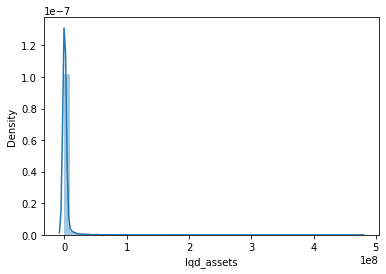

In [31]:
sns.distplot(df['lqd_assets'])